In [1]:
import numpy as np 
import pandas as pd

import json
from datetime import date, datetime
import datetime
import requests

In [2]:
# 更新日期
update_date = date.today()

# 加载数据
area_df = pd.read_csv(r'./api_datas/clean/area_clean_{}.csv'.format(update_date), encoding='utf-8')
area_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 19 columns):
cities                   257 non-null object
comment                  257 non-null object
confirmedCount           257 non-null int64
continentEnglishName     257 non-null object
continentName            257 non-null object
countryEnglishName       257 non-null object
countryFullName          218 non-null object
countryName              257 non-null object
curedCount               257 non-null int64
currentConfirmedCount    257 non-null int64
deadCount                257 non-null int64
locationId               257 non-null int64
provinceEnglishName      257 non-null object
provinceName             257 non-null object
provinceShortName        257 non-null object
suspectedCount           257 non-null int64
updateTime               257 non-null int64
deadRate                 256 non-null float64
curedRate                256 non-null float64
dtypes: float64(2), int64(7), object(10)
memo

In [3]:
area_df.head()

,cities,comment,confirmedCount,continentEnglishName,continentName,countryEnglishName,countryFullName,countryName,curedCount,currentConfirmedCount,deadCount,locationId,provinceEnglishName,provinceName,provinceShortName,suspectedCount,updateTime,deadRate,curedRate
0,暂无,暂无,16659,Asia,亚洲,Israel,Israel,以色列,13435,2946,278,955009,Israel,以色列,以色列,0,1589940101951,0.0167,0.8065
1,暂无,暂无,146,Africa,非洲,Mozambique,Mozambique,莫桑比克,48,98,0,984008,Mozambique,莫桑比克,莫桑比克,0,1589940101951,0.0000,0.3288
2,暂无,暂无,30572,Europe,欧洲,Belarus,Belarus,白俄罗斯,9932,20469,171,964001,Belarus,白俄罗斯,白俄罗斯,0,1589940101951,0.0056,0.3249
3,暂无,暂无,1502,Africa,非洲,Somali,Somalia,索马里,163,1280,59,985008,Somali,索马里,索马里,0,1589940101951,0.0393,0.1085
4,暂无,暂无,918,Asia,亚洲,Cyprus,Cyprus,塞浦路斯,504,388,26,955005,Cyprus,塞浦路斯,塞浦路斯,0,1589940101951,0.0283,0.5490


In [4]:
# 过滤境外输入的记录信息 cities != '暂无'
area = area_df[area_df['cities']=='暂无']
area['cities'].unique()

array(['暂无'], dtype=object)

### 可视化探索分析

In [5]:
## 设置
import matplotlib.pyplot as plt
%matplotlib inline

# 设置绘图的字体，特别是中文字体需要注意，避免出现乱码的情况
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

#### 各大洲确诊病例的统计情况（条形图）

In [6]:
# 对洲进行分组，计算各大洲的累计确诊病例
confirmed_per_continent = area_df.groupby('continentName')['confirmedCount'].sum().reset_index()
confirmed_per_continent.columns = ["continentName", "counts"]
# 数量降序排列
confirmed_per_continent = confirmed_per_continent.sort_values(by='counts')
confirmed_per_continent

,continentName,counts
1,其他,733
4,大洋洲,8495
6,非洲,92078
3,南美洲,487157
0,亚洲,921166
2,北美洲,1692244
5,欧洲,1728151


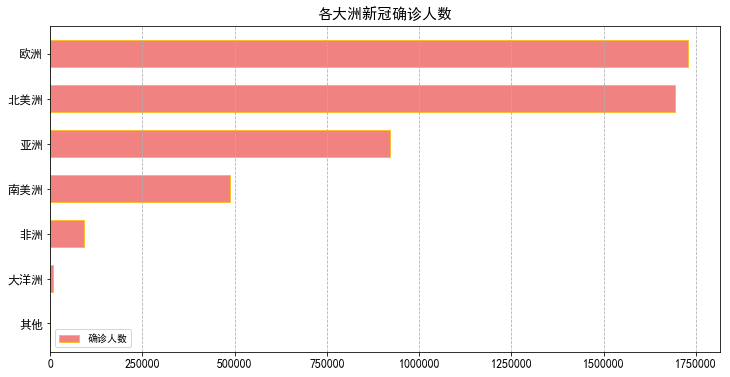

In [7]:
plt.figure(figsize=(12, 6))
# 绘制水平柱状图：height为柱子相对高度，facecolor为柱子填充色，edgecolor为柱子边缘色
plt.barh(confirmed_per_continent['continentName'].values.tolist(), 
         confirmed_per_continent['counts'].values.tolist(), 
         height=0.6, 
         facecolor='#EE6363', edgecolor='#FFB90F', 
         label="确诊人数", alpha=0.8)
# 其他属性设置
plt.title("各大洲新冠确诊人数", fontsize=15)
plt.grid(axis='x', linestyle='--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show();

 - 从以上图表可以看出，确诊病例最多的3个大洲分别是欧洲，北美洲，亚洲。其中欧洲病例数已经突破100万，北美洲确诊数次之。

In [8]:
## 查看累计确诊数排名前10的国家疫情基本信息
confirmed_top10 = area.sort_values(by="confirmedCount", ascending=False)[['countryName', 'confirmedCount', 'currentConfirmedCount', 'curedCount', 'deadCount']].head(10)
confirmed_top10

,countryName,confirmedCount,currentConfirmedCount,curedCount,deadCount
45,美国,1525367,1144245,289392,91730
43,俄罗斯,299941,220974,76130,2837
7,巴西,271628,146863,106794,17971
69,英国,248818,212938,539,35341
22,西班牙,232037,53883,150376,27778
94,意大利,226699,65129,129401,32169
52,德国,175210,11503,155700,8007
122,土耳其,151615,34521,112895,4199
117,法国,143427,52842,62563,28022
67,伊朗,124603,20311,97173,7119


In [9]:
# 计算确诊数前10国家的治愈率和死亡率
confirmed_top10['curedRate'] = (confirmed_top10['curedCount'] / confirmed_top10['confirmedCount']).apply(lambda x: round(x, 4))
confirmed_top10['deadRate'] = (confirmed_top10['deadCount'] / confirmed_top10['confirmedCount']).apply(lambda x: round(x, 4))

In [10]:
confirmed_top10

,countryName,confirmedCount,currentConfirmedCount,curedCount,deadCount,curedRate,deadRate
45,美国,1525367,1144245,289392,91730,0.1897,0.0601
43,俄罗斯,299941,220974,76130,2837,0.2538,0.0095
7,巴西,271628,146863,106794,17971,0.3932,0.0662
69,英国,248818,212938,539,35341,0.0022,0.1420
22,西班牙,232037,53883,150376,27778,0.6481,0.1197
94,意大利,226699,65129,129401,32169,0.5708,0.1419
52,德国,175210,11503,155700,8007,0.8886,0.0457
122,土耳其,151615,34521,112895,4199,0.7446,0.0277
117,法国,143427,52842,62563,28022,0.4362,0.1954
67,伊朗,124603,20311,97173,7119,0.7799,0.0571


Text(0.5,1,'主要国家新冠治愈率和死亡率关系的散点图')

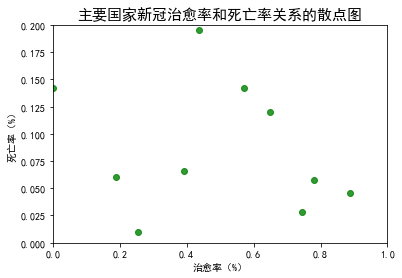

In [11]:
## 绘制疫情主要国家治愈率和死亡率关系的散点图
plt.scatter(confirmed_top10['curedRate'], confirmed_top10['deadRate'], c='green', marker='o', alpha=0.8)
plt.xlim([0, 1])
plt.ylim([0, 0.2])
plt.xlabel("治愈率（%）")
plt.ylabel("死亡率（%）")
plt.title("主要国家新冠治愈率和死亡率关系的散点图", fontsize=15)

Text(0.5,1,'所有国家新冠治愈率和死亡率关系的散点图')

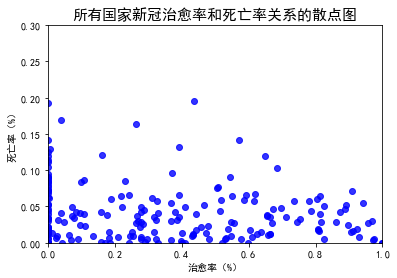

In [12]:
## 绘制所有国家治愈率和死亡率关系的散点图
plt.scatter(area['curedRate'], area['deadRate'], c='blue', marker='o', alpha=0.8)
plt.xlim([0, 1])
plt.ylim([0, 0.3])
plt.xlabel("治愈率（%）")
plt.ylabel("死亡率（%）")
plt.title("所有国家新冠治愈率和死亡率关系的散点图", fontsize=15)

 - 由上图可知，世界各国的总体死亡率在0~25%之间，但是治愈率有着很大差别。这与各国采取的防疫措施，医疗条件的差异有密切联系。

### 治愈率均线图

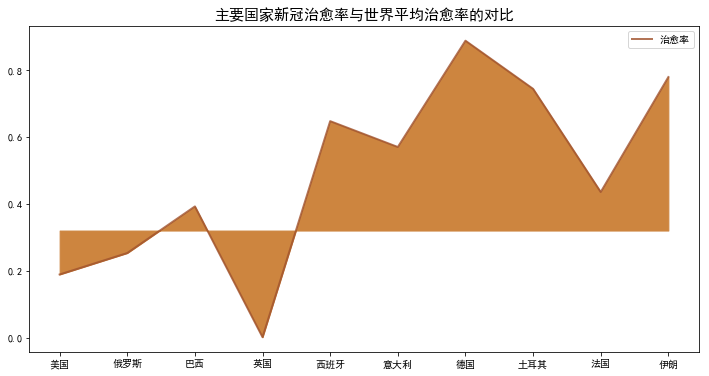

In [13]:
plt.figure(figsize=(12,6))
plt.plot(confirmed_top10['countryName'], confirmed_top10['curedRate'], color="#A0522D", alpha=0.8, label="治愈率", linewidth=2, linestyle="-")
# 绘制数据的均线，并进行颜色填充
curedRate_mean = area['curedRate'].mean()   # 计算全世界国家新冠治愈率的平均值
plt.fill_between(confirmed_top10['countryName'], curedRate_mean, confirmed_top10['curedRate'], color="#CD853F")    # 填充均值线于图线（参数y1和y2围成区域）之间围城的区域
plt.title("主要国家新冠治愈率与世界平均治愈率的对比", fontsize=15)
plt.legend()
plt.show();

### 从以上治愈率均线图可以看出，确诊病例前10国家中，美国，英国治愈率低于世界平均；而其他均高于世界平均治愈率。其中德国，伊朗，土耳其的治愈率位列前三。